In [12]:
import pandas as pd
import sqlite3
import matplotlib as plt

from path_util import data_path, revisions_path

In [2]:
db_path = data_path / "data_bases" / "all_occupations.db"

con = sqlite3.connect(db_path)

df = pd.read_sql('SELECT occ_code, occ_group, occ_title, Women, White, African_American, Asian, Hispanic  FROM occupations', con)

## Getting overall occupation data

In [3]:
bls_gender_race_excel_path = data_path / "bls" / "gender_race_hispanic" / "cpsaat11_gender, races, hispanic.xlsx"

gender_race_df = pd.read_excel(bls_gender_race_excel_path, skiprows = 6)
gender_race_df.head()

Women_overall_employment = gender_race_df["Unnamed: 2"][0]/100
White_overall_employment = gender_race_df["Unnamed: 3"][0]/100
AfricAm_overall_employment = gender_race_df["Unnamed: 4"][0]/100
Asian_overall_employment = gender_race_df["Unnamed: 5"][0]/100
Hispanic_overall_employment = gender_race_df["Unnamed: 6"][0]/100

mapping_dict = {"women": Women_overall_employment, "white": White_overall_employment, 
                "african_american": AfricAm_overall_employment, "asian": Asian_overall_employment,
                "hispanic": Hispanic_overall_employment}

print("Employment of Women:", Women_overall_employment, "\n"
     "Employment of White People:", White_overall_employment, "\n"
     "Employment of African Americans", AfricAm_overall_employment, "\n"
     "Employment of Asians:", Asian_overall_employment, "\n"
     "Employment of Hispanic People:", Hispanic_overall_employment)

Employment of Women: 0.47 
Employment of White People: 0.775 
Employment of African Americans 0.12300000000000001 
Employment of Asians: 0.066 
Employment of Hispanic People: 0.18


In [10]:
df = df.loc[df['women'] != "NaN"]
df = df.loc[df['women'] != "null"]

for col in ["women", "white", "african_american", "asian", "hispanic"]:
    df[col] = df[col].astype(float)
    df[col] = df[col].apply(lambda x: round(x, 3))

df.head()

,occ_code,occ_group,occ_title,women,white,african_american,asian,hispanic
0,11-0000,major,Management Occupations,0.409,0.822,0.086,0.065,0.111
2,11-1010,broad,Chief Executives,0.291,0.857,0.059,0.068,0.074
3,11-1011,detailed,Chief Executives,0.291,0.857,0.059,0.068,0.074
4,11-1020,broad,General and Operations Managers,0.364,0.827,0.093,0.046,0.103
5,11-1021,detailed,General and Operations Managers,0.364,0.827,0.093,0.046,0.103


## Completeness

Seeing what percentage of rows is available for each occupation group is in the above df. Note that the above df includes ~170 (771 not-null values - ~600 rows from the excel) duplicates, because often times the broad and detailed group have the exact same name.

<BarContainer object of 4 artists>

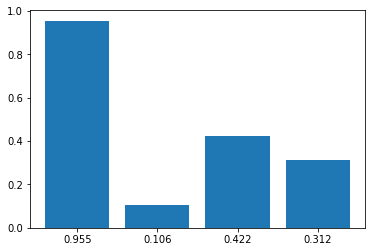

In [23]:
pct_major = round((len(df.loc[df['occ_group'] == "major"]) / 22), 3)
pct_minor = round((len(df.loc[df['occ_group'] == "minor"]) / 94), 3)
pct_broad = round((len(df.loc[df['occ_group'] == "broad"]) / 448), 3)
pct_detailed = round((len(df.loc[df['occ_group'] == "detailed"]) / 831), 3)

values = [pct_major, pct_minor, pct_broad, pct_detailed]
descriptions = [str(item) for item in values]

plt.pyplot.bar(descriptions, values)

## Plotting

In [6]:
def positive_negative_barchart(df, target_column, occ_group):
    df = df.loc[df['occ_group'] == occ_group]

    # RELATIVE TO OVERALL EMPLOYMENT:
    plot_dict = {"name": df["occ_title"].tolist(), "values": [(value - mapping_dict[target_column]) for value in df[target_column]]}
    
    # ABSOLUTE EMPLOYMENT VALUES:
    # plot_dict = {"name": df["occ_title"].tolist(), "values": df[target_column]}
    
    plot_df = pd.DataFrame.from_dict(plot_dict)
    plot_df.plot(x = "name", y = "values", kind = 'barh', figsize = (18, 10))

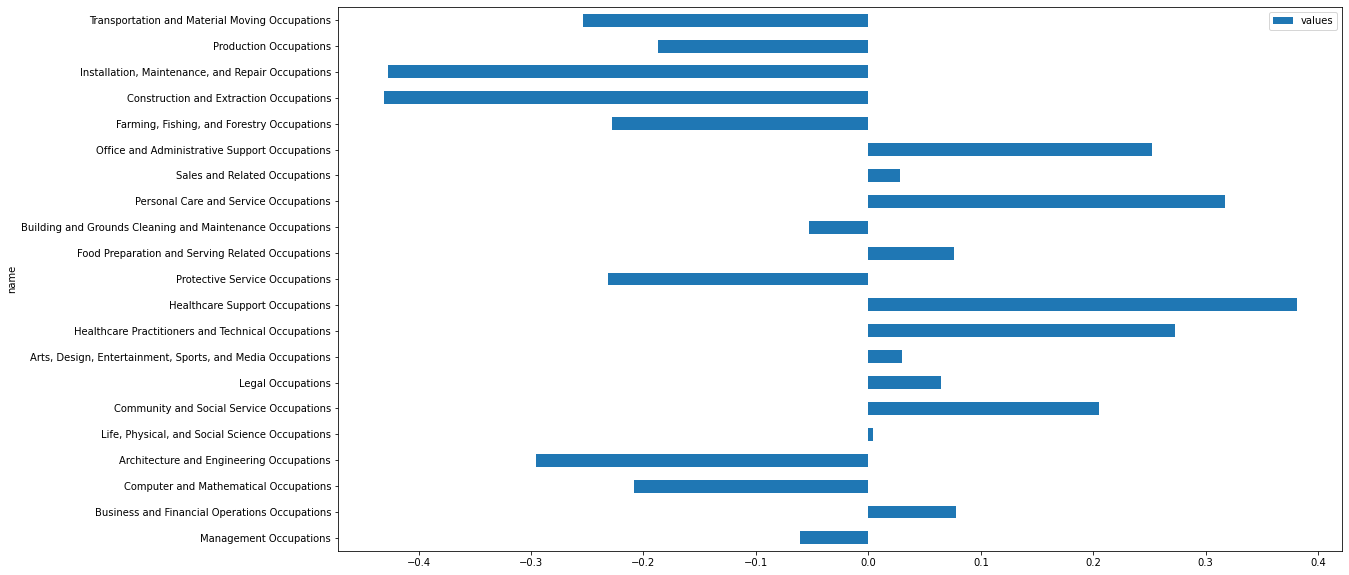

In [8]:
positive_negative_barchart(df, "women", "major")